<a href="https://colab.research.google.com/github/sebas-serrano/Diabetes_Health_Indicators/blob/main/notebooks/Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indicadores de Salud de la Diabetes

Este proyecto tiene como finalidad tratar el tema de la diabetes en los Estados Unidos.

El data set se saco de la pagina kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

La diabetes es una de las enfermedades crónicas más comunes en Estados Unidos, afectando a millones de personas y generando un fuerte impacto económico. Se produce cuando el cuerpo pierde la capacidad de regular adecuadamente la glucosa en sangre, ya sea por una producción insuficiente de insulina o por una mala utilización de la misma. Esto puede reducir la calidad y la esperanza de vida.

Los niveles elevados de azúcar en sangre, mantenidos en el tiempo, pueden causar complicaciones graves como enfermedades cardíacas, pérdida de visión, amputaciones y daño renal. Aunque no tiene cura, hábitos saludables, actividad física y tratamientos médicos adecuados pueden reducir significativamente sus efectos. La detección temprana es clave, y por eso los modelos predictivos son herramientas valiosas para la salud pública.

En cuanto a su magnitud, en 2018 se estimaba que 34,2 millones de estadounidenses tenían diabetes y 88 millones presentaban prediabetes, muchos sin saberlo. La diabetes tipo II es la más frecuente y su prevalencia varía según factores como edad, ingresos, educación, raza y condiciones socioeconómicas. Además, esta enfermedad implica un costo económico enorme, superando los 327 mil millones de dólares anuales.

Preguntas de investigación sugeridas

*   ¿Pueden las preguntas de la encuesta BRFSS predecir con precisión si una persona tiene diabetes?
*   ¿Qué factores de riesgo son los más predictivos del desarrollo de diabetes?
*   ¿Podemos usar solo un subconjunto de factores de riesgo para predecir con precisión la presencia de diabetes?
*   ¿Es posible crear una versión reducida del cuestionario BRFSS, seleccionando solo las variables más importantes, que permita predecir si alguien tiene diabetes o está en alto riesgo?


# ETL

## 1- EXTRACT - Carga de Datos (solo la primera vez)

In [3]:
!git clone https://github.com/sebas-serrano/Diabetes_Health_Indicators.git

Cloning into 'Diabetes_Health_Indicators'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 46 (delta 15), reused 6 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 5.42 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (15/15), done.


Importacion de librerias / Lectura de archivos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

df_multi = pd.read_csv("/content/Diabetes_Health_Indicators/data/diabetes_012_health_indicators_BRFSS2015.csv")
df_multi.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 2 - TRANSFORM - Limpieza y Preparación de Datos

*  Revisión inicial (shape, info, head)
*  Limpieza de valores (nulos, formatos)
*  Limpieza estructural (columnas nulas, duplicados, eliminar columnas)
*  Feature engineering

In [6]:
df_multi.shape

(253680, 22)

In [7]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Es claro que no hay columnas con informacion NULA, asi que no eliminamos ninguna columna.

## EDA - Análisis Exploratorio Univariado

Objetivo del análisis univariado

Analizar cada variable por separado para:

1. Entender su distribución
2. Detectar outliers
3. Identificar sesgos
4. Decidir transformaciones futuras


#### Analisisn de la variable Objetivo Diabetes_012

In [7]:
# Confirmamos el tipo de la columna es Float
print(df_multi['Diabetes_012'].dtype)

float64


In [9]:
# Vemos que valores tiene la variable
df_multi['Diabetes_012'].value_counts().sort_index()

,count
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


Gráfica de distribución de la variable objetivo (Diabetes_012)

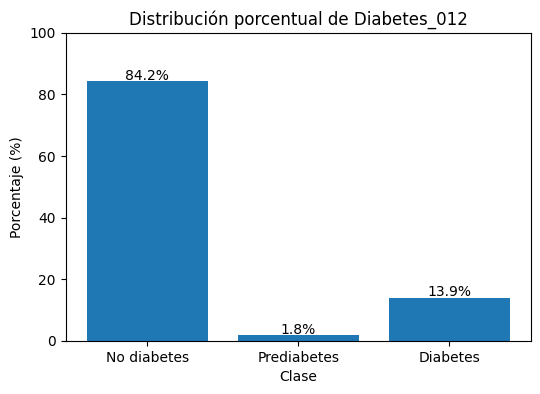

In [13]:
import matplotlib.pyplot as plt

# Conteo y porcentaje
counts = df_multi['Diabetes_012'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Gráfico
plt.figure(figsize=(6,4))
plt.bar(
    ['No diabetes', 'Prediabetes', 'Diabetes'],
    percentages.values
)

plt.title('Distribución porcentual de Diabetes_012')
plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')

# Etiquetas con porcentaje
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.ylim(0, 100)
plt.show()

La variable objetivo Diabetes_012 presenta un fuerte desbalance de clases.
La gran mayoría de los registros corresponde a personas sin diabetes (84,2%), mientras que los casos de diabetes representan el 13,9% y la prediabetes apenas el 1,8% del total.

Este desbalance implica que los modelos de clasificación podrían verse sesgados hacia la clase mayoritaria si no se aplican estrategias adecuadas durante el modelado. En particular, la clase Prediabetes se encuentra subrepresentada, lo que dificulta su correcta identificación y justifica el uso de métricas más robustas que la accuracy, así como técnicas de balanceo o ajustes en el entrenamiento.

Desde el punto de vista del negocio y la salud pública, este comportamiento es relevante, ya que refuerza la importancia de detectar correctamente los casos minoritarios, especialmente aquellos en riesgo de desarrollar diabetes.

#### **ANALISIS DE VARIABLES CUANTITATIVAS**

(Numéricas continuas o discretas)

1. BMI
2. MentHlth
3. PhysHlth
4. Age
5. GenHlth
6. Education
7. Income

In [8]:
df_multi[
    ['BMI','MentHlth','PhysHlth','Age','GenHlth','Education','Income']
].describe()

,BMI,MentHlth,PhysHlth,Age,GenHlth,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081,8.032119,2.511392,5.050434,6.053875
std,6.608694,7.412847,8.717951,3.054220,1.068477,0.985774,2.071148
min,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000,2.000000,4.000000,5.000000
50%,27.000000,0.000000,0.000000,8.000000,2.000000,5.000000,7.000000
75%,31.000000,2.000000,3.000000,10.000000,3.000000,6.000000,8.000000
max,98.000000,30.000000,30.000000,13.000000,5.000000,6.000000,8.000000


#### **ANALISIS DE VARIABLES CUALITATIVAS / CATEGORICAS**

(binarias u ordinales)

1. HighBP
2. HighChol
3. CholCheck
4. Smoker
5. Stroke
6. HeartDiseaseorAttack
7. PhysActivity
8. Fruits
9. Veggies
10. HvyAlcoholConsump
11. AnyHealthcare
12. NoDocbcCost
13. DiffWalk
14. Sex

####